# WITH PANDAS AND MATPLOTLIB

In [284]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [285]:
kill0 = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [286]:
kill = kill0.copy()

## 1: Plot number of people by gender

In [287]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [288]:
gender_count = kill.groupby("gender")["id"].count().sort_values(ascending = False)
gender_count

gender
M    2428
F     107
Name: id, dtype: int64

In [289]:
gender_text = kill.groupby("gender").sum().index
gender_text

Index(['F', 'M'], dtype='object', name='gender')

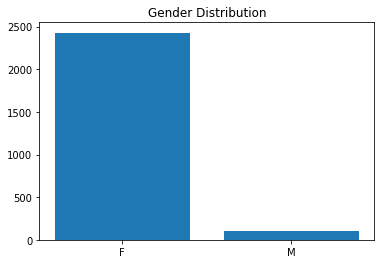

In [290]:
# with matplotlib


from operator import index
plt.figure

ax = plt.bar( gender_text , gender_count , data = kill)
plt.title("Gender Distribution")
ax.patches[0].get_height()

plt.show()

## 2: Plot 7 most common kill weapons

In [291]:
armed_count = kill.groupby("armed")["armed"].count().sort_values(ascending = False).head(7)
armed_count


armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [292]:
armed_text = kill.groupby("armed")["armed"].count().sort_values(ascending = False).head(7).index
armed_text

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object', name='armed')

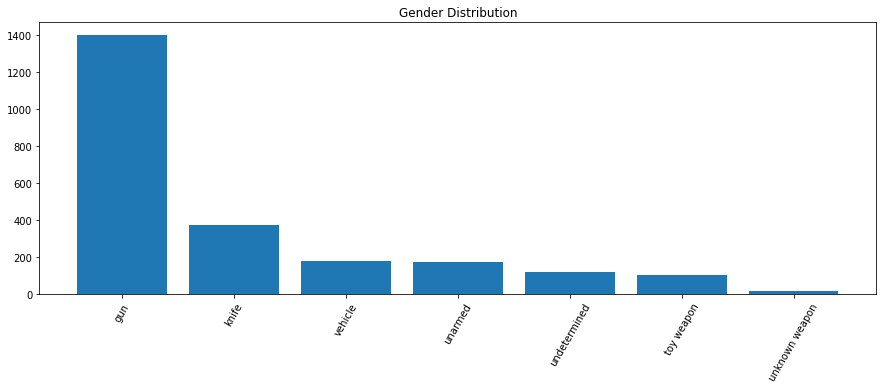

In [293]:
# with matplotlib
from operator import index
plt.figure(figsize= (15,5))

plt.bar( armed_text , armed_count , data = kill)
plt.title("Gender Distribution")
plt.xticks(rotation = 60)
plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

<AxesSubplot:xlabel='age'>

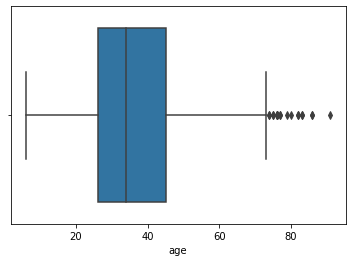

In [294]:
sns.boxplot("age", data = kill )

In [295]:
kill["age"].fillna(method = "ffill", inplace = True)

In [296]:
kill["age"].fillna(method = "bfill", inplace = True)
kill["age"].sort_values()

830      6.0
1014    12.0
1678    13.0
1585    14.0
1294    15.0
        ... 
275     83.0
426     86.0
1675    86.0
2161    91.0
2160    91.0
Name: age, Length: 2535, dtype: float64

In [298]:
conditions = [(kill['age'] <= 25), (kill['age'] > 25) ]

values = ["below25", "above25"]

kill['age_cat'] = np.select(conditions, values)

kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [325]:
age_cat_text = kill.groupby("age_cat").sum().index
age_cat_text

Index(['above25', 'below25'], dtype='object', name='age_cat')

In [322]:
age_cat_count = kill.groupby("age_cat")["age_cat"].count().sort_values(ascending = False)
age_cat_count

age_cat
above25    1963
below25     572
Name: age_cat, dtype: int64

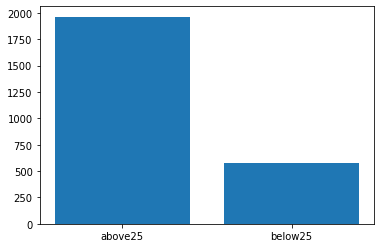

In [327]:
# with matplotlib
from operator import index
plt.figure

ax = plt.bar( age_cat_text , age_cat_count , data = kill)


plt.show()

## 4: Plot number of killed poeple by race

In [300]:
race_count = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7)
race_count

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [301]:
race_text = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7).index
race_text

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

In [302]:
# with matplotlib


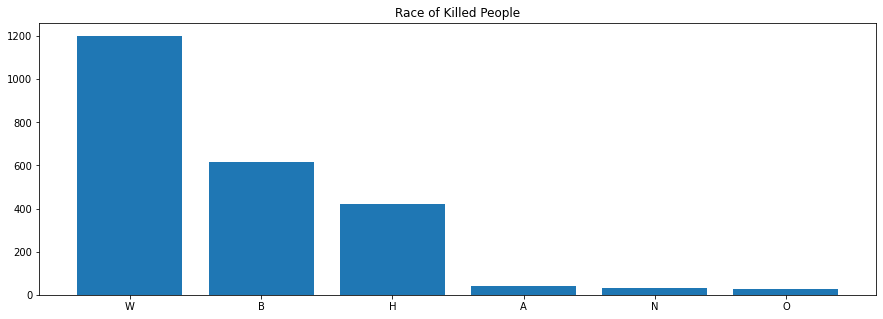

In [303]:
plt.figure(figsize= (15,5))

plt.bar( race_text , race_count , data = kill)
plt.title("Race of Killed People")

plt.show()

## 5: Killed People According to Races (Pie Chart)

In [304]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [305]:
race_text = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7).index
race_text

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

In [306]:
race_count = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7)
race_count

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [307]:
kill.dropna(axis = 0, how = "any",  inplace = False)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,below25
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,above25
2528,2812,Alejandro Alvarado,27/07/17,shot,knife,31.0,M,H,Chowchilla,CA,False,attack,Not fleeing,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [308]:
race_count = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7)
race_count

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [309]:
race_text = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7).index
race_text

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

In [310]:
y = np.array(race_count)
y

array([1201,  618,  423,   39,   31,   28], dtype=int64)

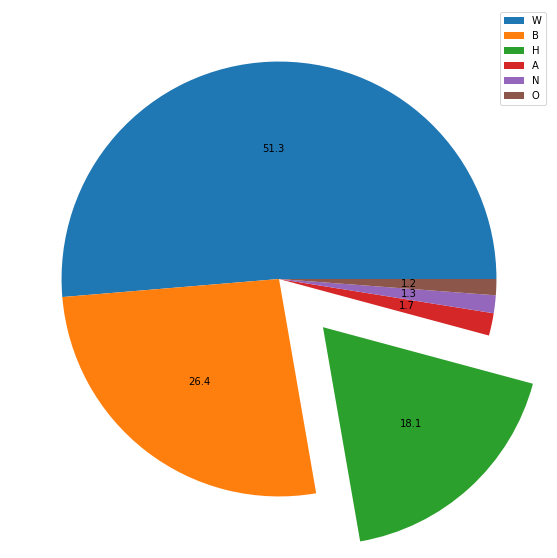

In [311]:
# matplotlib

plt.figure(figsize= (20,10))
mylabels = kill.groupby("race")["race"].count().sort_values(ascending = False).head(7).index
myexplode = [0, 0, 0.3, 0, 0, 0]
plt.pie(y, labels = mylabels, explode=myexplode, labeldistance=None, autopct="%.1f")
plt.legend()
plt.show()
